## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

#### Step 1 : Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
pd.set_option('display.max_columns',None)

#### 1. Read the data

In [4]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Step 2 : Data Insepection and cleaning

In [5]:
# Dropping duplicate rows
leads=leads.drop_duplicates()

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
leads.select_dtypes(include = 'object').describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,3f42b643-5115-47b4-8384-f5e8508ad9cf,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


We can see that several columns have select as a value,
This is because customer did not select any option from the list, hence it shows select.

In [9]:
leads.replace('Select',np.nan,inplace = True)


#### 2.1 : EDA -Exploratory data Analysis  - 

Univariate Analysis

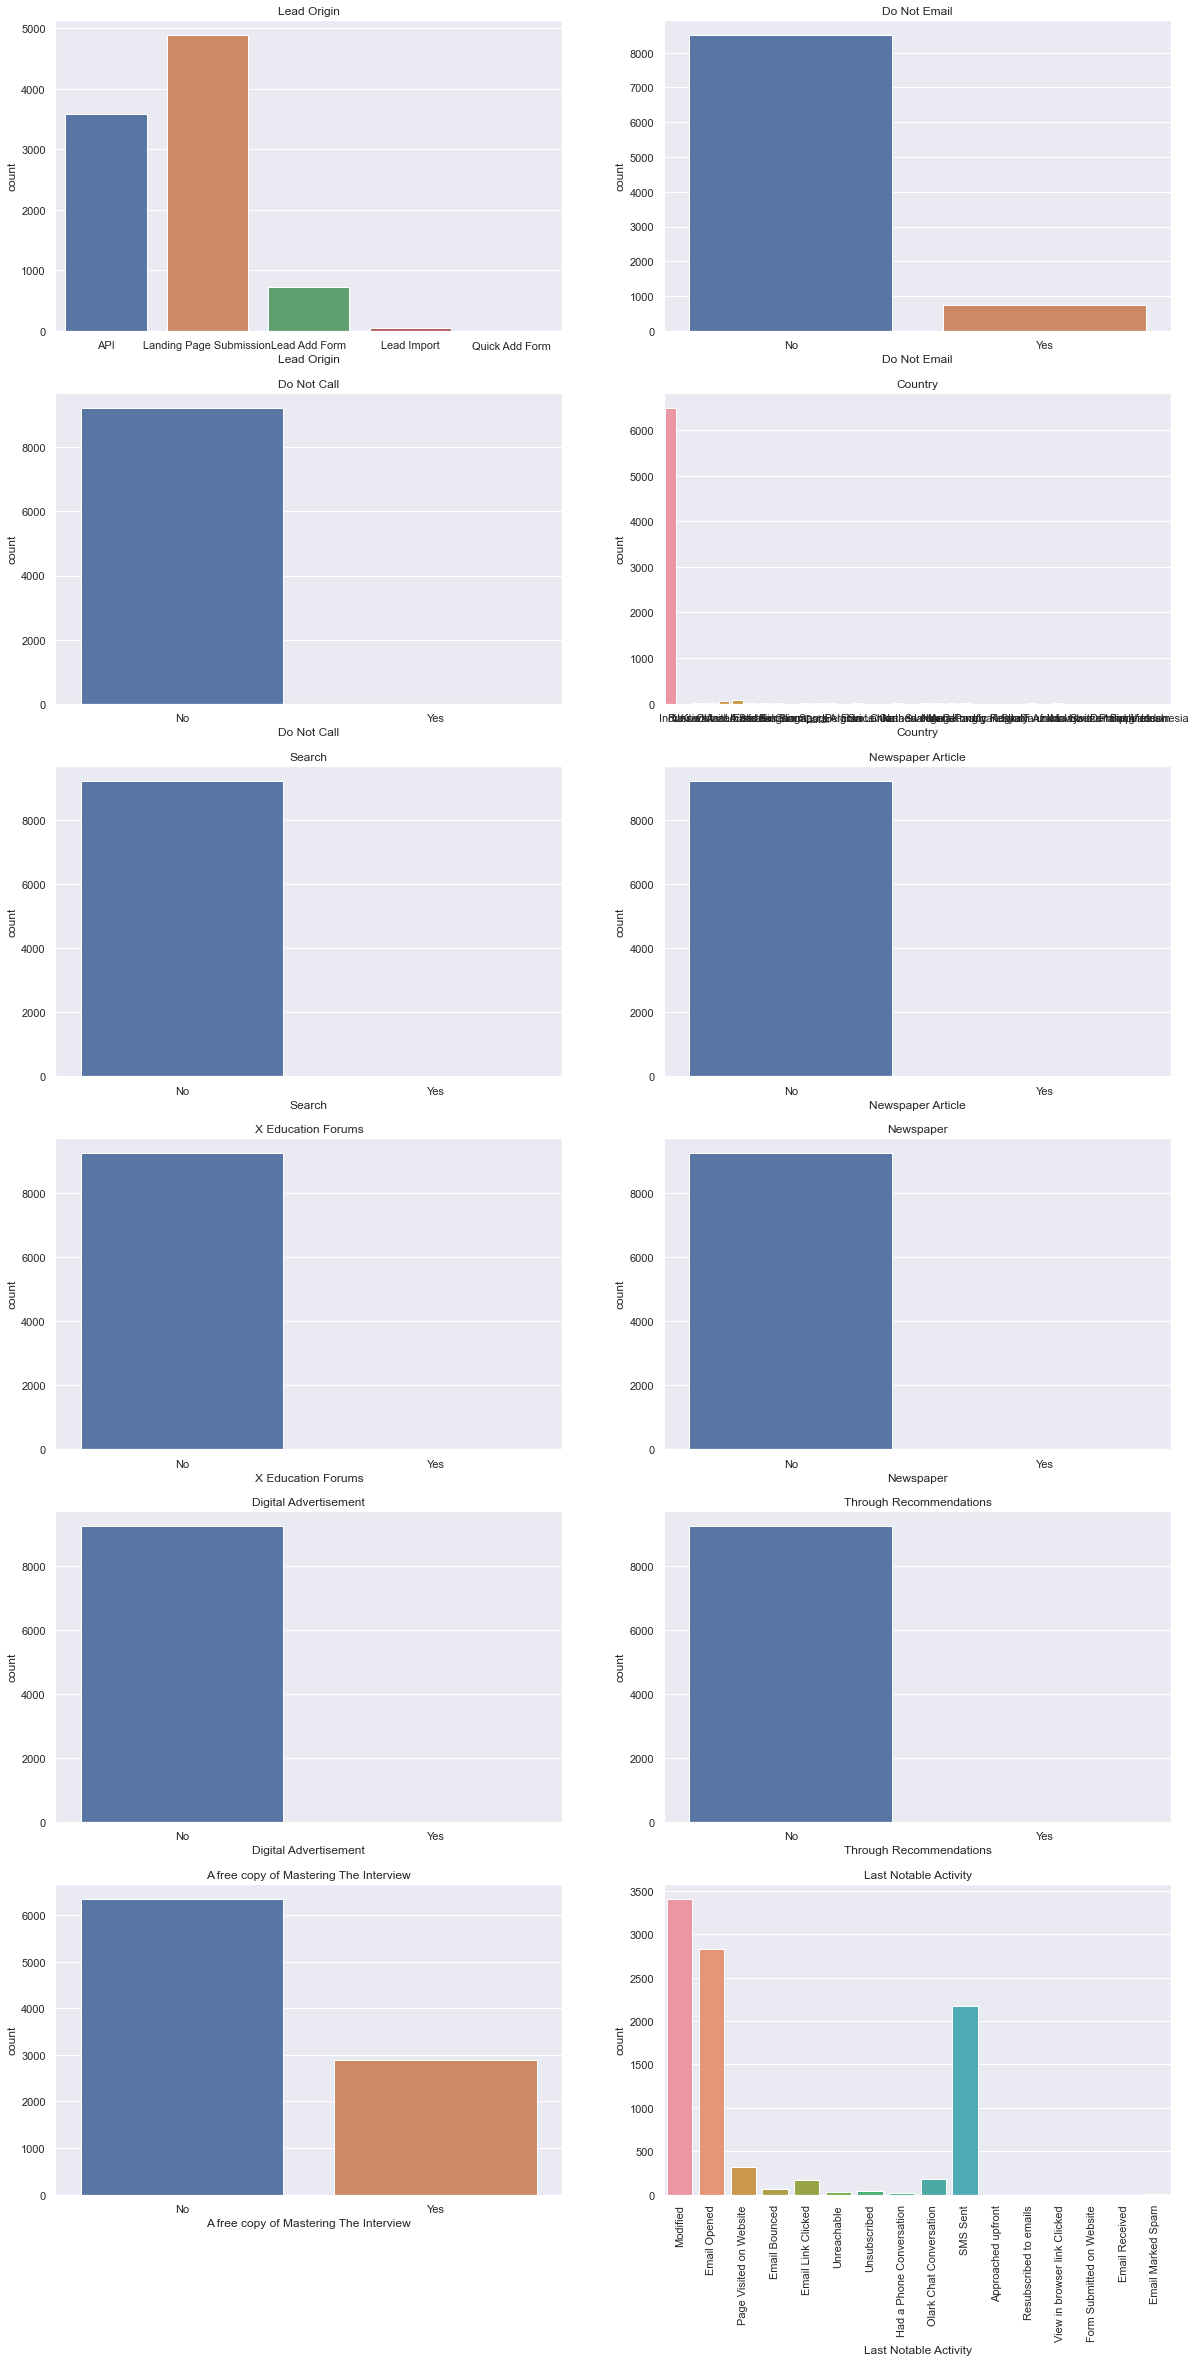

In [10]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leads['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leads['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(leads['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(leads['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(leads['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(leads['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(leads['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(leads['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(leads['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(leads['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(leads['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(leads['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

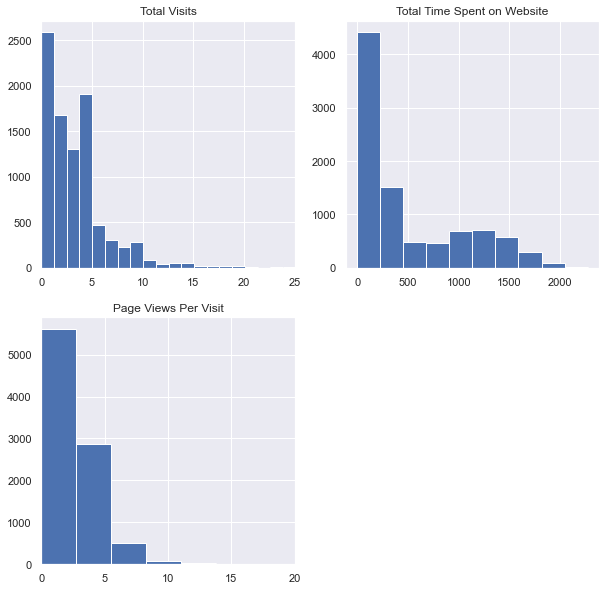

In [11]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leads['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leads['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

##### Bi variate Analysis:

#### How did you hear about X Education

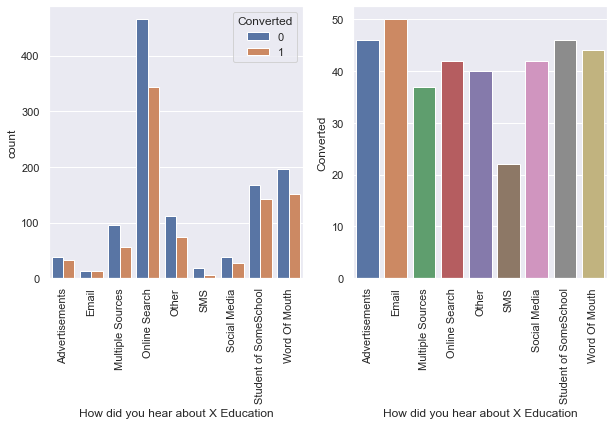

In [12]:
order = sorted(leads['How did you hear about X Education'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'How did you hear about X Education',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'How did you hear about X Education',y='Converted',data = round(100*leads.groupby('How did you hear about X Education')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()


Inference-As we can see that there isnt a huge variation in terms conversion rate for majority of them. We can see that conversion rate through SMS is very low hence may be education X can avoid sending sms.

#### Lead Profile

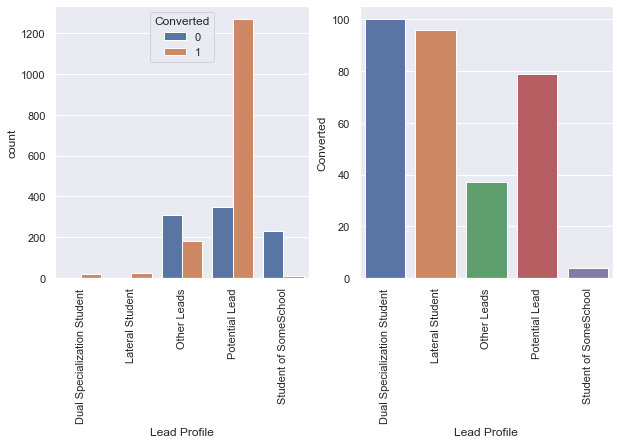

In [13]:
order = sorted(leads['Lead Profile'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Lead Profile',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Lead Profile',y='Converted',data = round(100*leads.groupby('Lead Profile')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

Inference-We can see that except other Leads and Student of SomeSchool other have significantly higher percentage of conversion rate.

#### Lead Quality

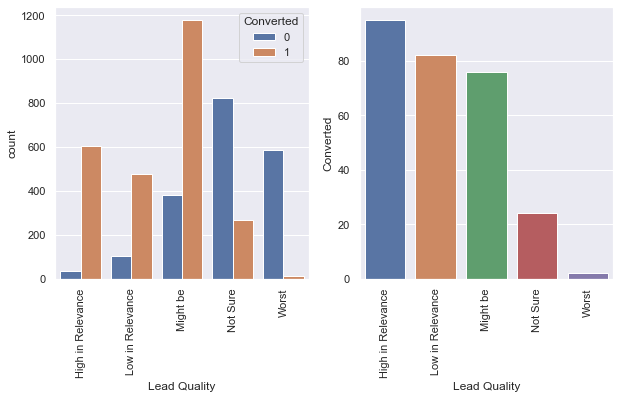

In [14]:
order = sorted(leads['Lead Quality'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Lead Quality',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Lead Quality',y='Converted',data = round(100*leads.groupby('Lead Quality')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

Inference - We can see that worst and Not sure have significantly lower conversion rates

#### Asymmetrique Profile Score

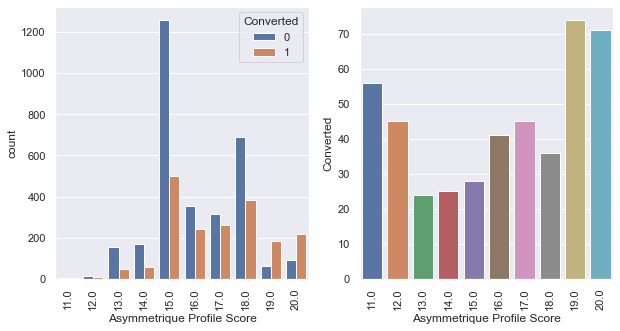

In [15]:
order = sorted(leads['Asymmetrique Profile Score'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Asymmetrique Profile Score',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Asymmetrique Profile Score',y='Converted',data = round(100*leads.groupby('Asymmetrique Profile Score')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

Inference - Asymmetrique Profile Score of 19.0 has the highest converted rate .

#### Asymmetrique Profile Index

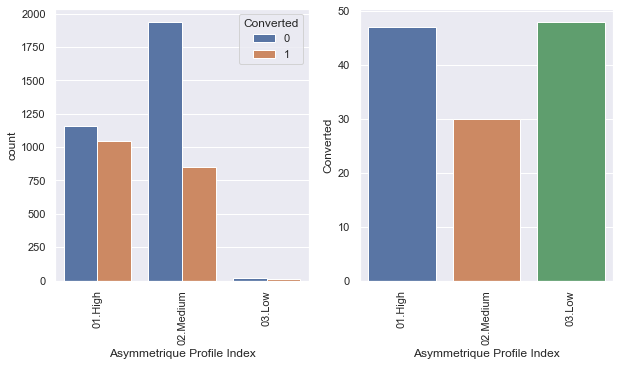

In [16]:
order = sorted(leads['Asymmetrique Profile Index'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Asymmetrique Profile Index',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Asymmetrique Profile Index',y='Converted',data = round(100*leads.groupby('Asymmetrique Profile Index')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()


#### Asymmetrique Activity Score

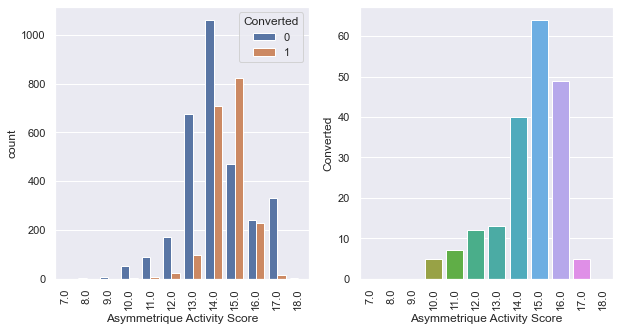

In [17]:
order = sorted(leads['Asymmetrique Activity Score'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Asymmetrique Activity Score',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Asymmetrique Activity Score',y='Converted',data = round(100*leads.groupby('Asymmetrique Activity Score')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

Inference - Asymmetrique Activity Score for 15.0 will be the highest

#### Asymmetrique Activity Index

In [18]:
leads['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

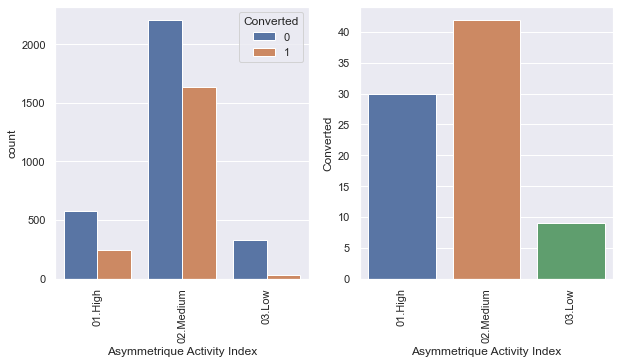

In [19]:
order = sorted(leads['Asymmetrique Activity Index'].value_counts().index.tolist())
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Asymmetrique Activity Index',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Asymmetrique Activity Index',y='Converted',data = round(100*leads.groupby('Asymmetrique Activity Index')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

Inference - Medium - Asymmetrique Activity Index has the highest coverted ratio .

#### What is your current occupation

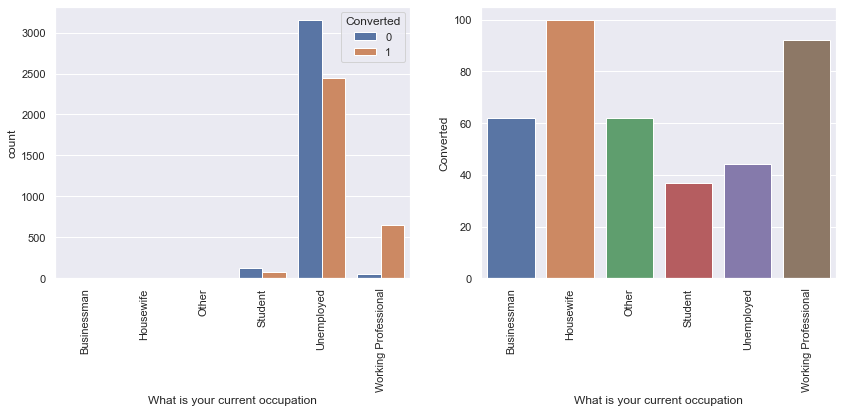

In [20]:
order = sorted(leads['What is your current occupation'].value_counts().index.tolist())
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(x = 'What is your current occupation',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'What is your current occupation',y='Converted',data = round(100*leads.groupby('What is your current occupation')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

Inference - 

Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in numbers but has around 30-35% conversion rate.

#### Lead Origin

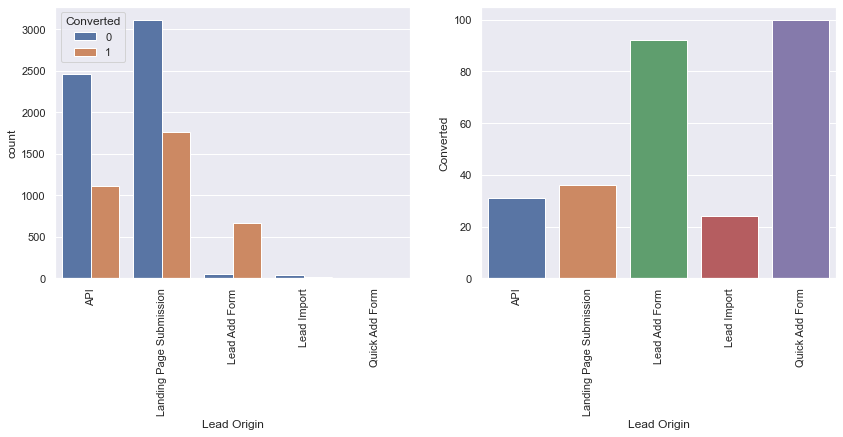

In [21]:
order = sorted(leads['Lead Origin'].value_counts().index.tolist())
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Lead Origin',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Lead Origin',y='Converted',data = round(100*leads.groupby('Lead Origin')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()



Inference-
-API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.

-Lead Add Form has more than 90% conversion rate but count of lead are not very high.

-Lead Import are very less in count.

-To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

#### Lead Source

In [22]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
youtubechannel          1
blog                    1
NC_EDM                  1
welearnblog_Home        1
testone                 1
Name: Lead Source, dtype: int64

In [23]:
leads_source_df = leads['Lead Source'].value_counts()

In [24]:
def leadsource(x):
    if x in leads_source_df[leads_source_df < 30].index.tolist():
        return 'Others'
    else :
        return x

In [25]:
# Adding all small source to others
leads['Lead Source'] = leads['Lead Source'].apply(leadsource)

In [26]:
leads['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                28
Name: Lead Source, dtype: int64

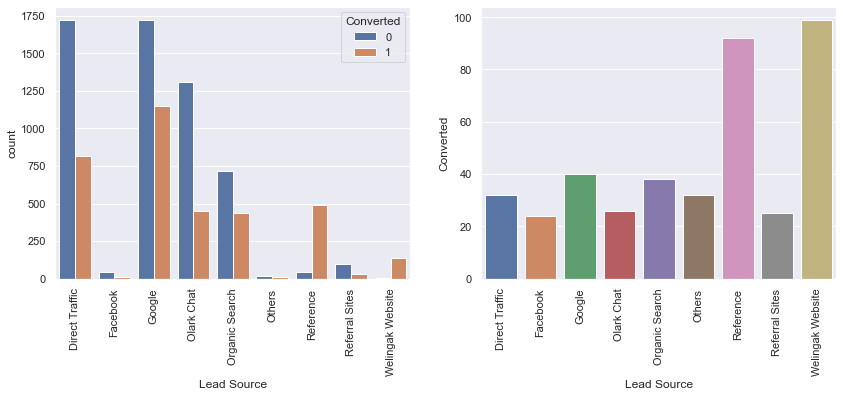

In [27]:
order = sorted(leads['Lead Source'].value_counts().index.tolist())
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Lead Source',hue = 'Converted',data = leads,order = order)
plt.xticks(rotation = 'vertical')
plt.subplot(1,2,2)
sns.barplot(x= 'Lead Source',y='Converted',data = round(100*leads.groupby('Lead Source')['Converted'].mean()).reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

Inference -

-Google and Direct traffic generates maximum number of leads.

-Conversion Rate of reference leads and leads through welingak website is high.

-To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.



#### Last Activity

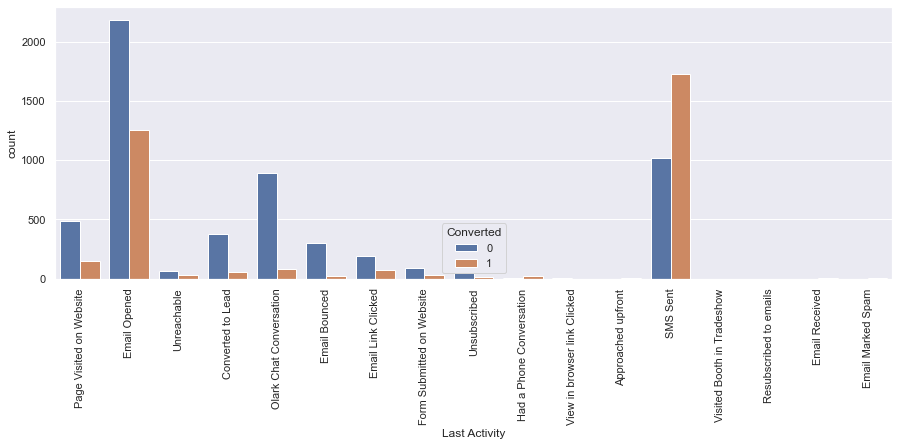

In [28]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
plt.xticks(rotation = 'vertical')
plt.show()

In [29]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

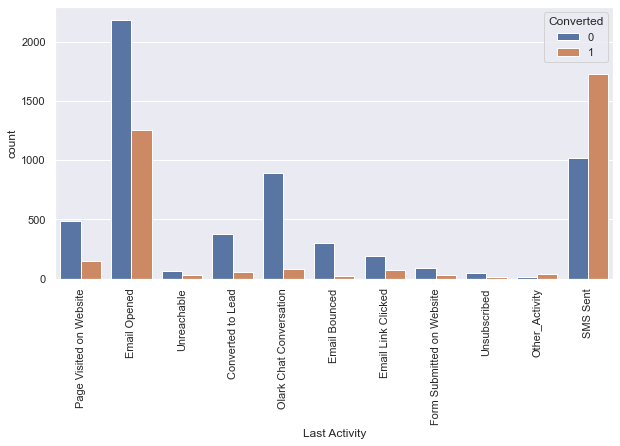

In [30]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

Inference -

1.Most of the lead have their Email opened as their last activity.

2.Conversion rate for leads with last activity as SMS Sent is almost 60%

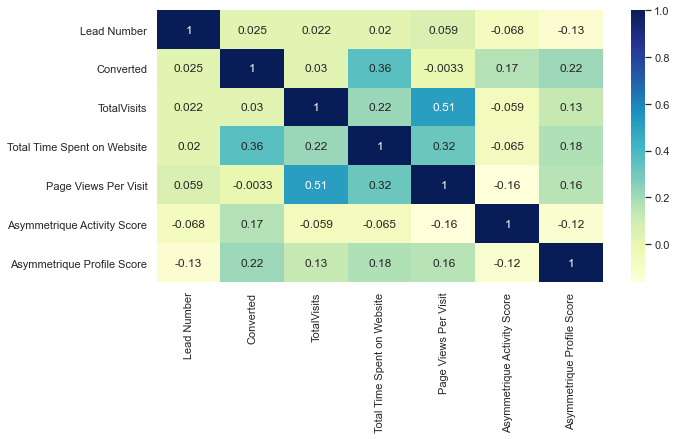

In [31]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(10, 5))
sns.heatmap(leads.corr(), cmap="YlGnBu",annot=True)
plt.show()

<Figure size 360x360 with 0 Axes>

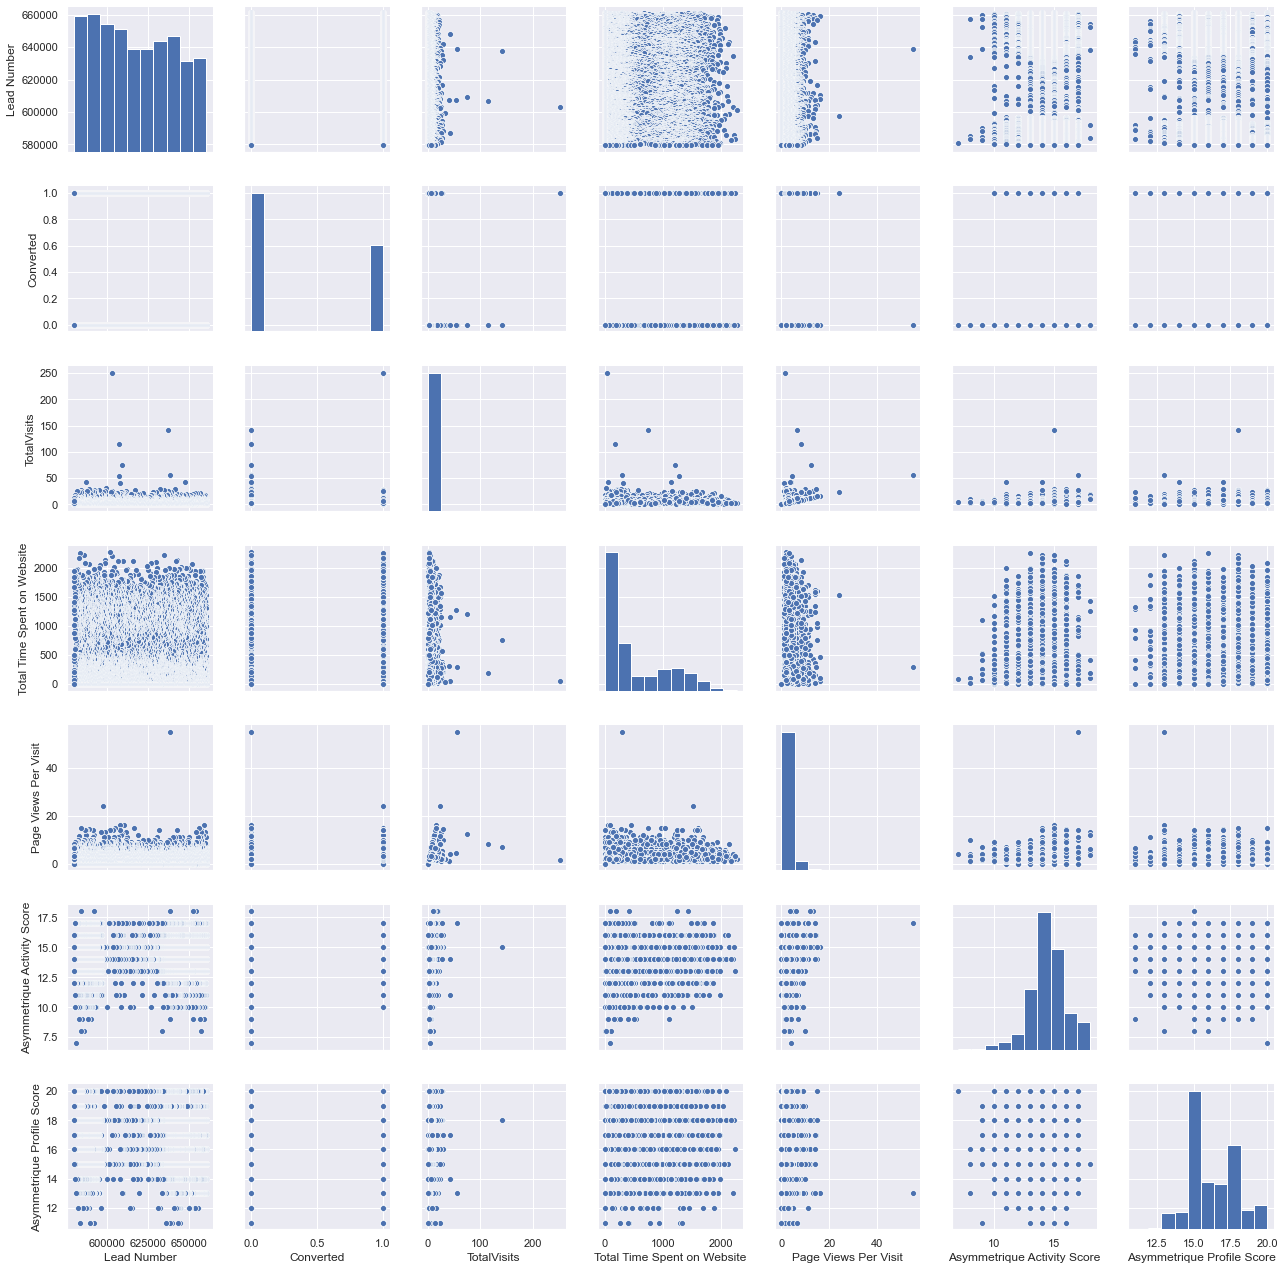

In [32]:
#pairplot of numerical variables
plt.figure(figsize = (5,5))
sns.pairplot(leads)
plt.show()

### Univariate Analysis Conclusion:
Here is low variation in Page Views Per Visit and TotalVisits but higher variation in Total Time Spent on Website
There are a lot of outliers in Page Views Per Visit and TotalVisits which needs to be treated before modelling

### Bivariate Analysis Conclusion:

There is positive correlation between Total Time Spent on Website and Conversion
There is come correlation between Conversion and some categorical columns like Lead Origin and Lead Source
Correlation Analysis (Heatmap) Conclusion:

There is positive correlation between Total Time Spent on Website and Conversion
There is almost no correlation in Page Views Per Visit and TotalVisits with Conversion

#### 2.2 Null value Check - 

Checking the percentage of null values in the records -

In [33]:
print('null values as percentage of total records:\n')
print(round(100*leads.isnull().sum(axis = 0)[leads.isnull().sum(axis = 0)>0].sort_values(ascending = False)/len(leads),2))

null values as percentage of total records:

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Activity Score                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64


#### 2.3  Dropping colums which have high number of null values and don't  have much significance impact on the conversion rate - 30% of values

In [34]:
to_be_dropped = round(100*leads.isnull().sum(axis = 0)[leads.isnull().sum(axis = 0)>0].sort_values(ascending = False)/len(leads),2)

In [35]:
leads1 = leads.drop(to_be_dropped[to_be_dropped>30].index.tolist(),axis = 1)

In [36]:
leads1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [37]:
#Dropping Country,Current Occcupation and reason for choosing course
leads1.drop(['Country','What matters most to you in choosing a course','What is your current occupation'],axis = 1,inplace = True)

In [38]:
leads1.drop(['Lead Number'],axis = 1,inplace = True)

In [39]:
print('null values as percentage of total records:\n')
print(round(100*leads1.isnull().sum(axis = 0)[leads1.isnull().sum(axis = 0)>0].sort_values(ascending = False)/len(leads1),2))

null values as percentage of total records:

Page Views Per Visit    1.48
TotalVisits             1.48
Last Activity           1.11
Lead Source             0.39
dtype: float64


In [40]:
#Dropping the rows with null values
leads1 = leads1[~pd.isnull(leads1['TotalVisits'])]

In [41]:
print('null values as percentage of total records:\n')
print(round(100*leads1.isnull().sum(axis = 0)[leads1.isnull().sum(axis = 0)>0].sort_values(ascending = False)/len(leads1),2))

null values as percentage of total records:

Lead Source    0.32
dtype: float64


In [42]:
leads1 = leads1[~(pd.isnull(leads1['Lead Source']))]

In [43]:
print('null values as percentage of total records:\n')
print(round(100*leads1.isnull().sum(axis = 0)[leads1.isnull().sum(axis = 0)>0].sort_values(ascending = False)/len(leads1),2))

null values as percentage of total records:

Series([], dtype: float64)


In [44]:
leads1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Origin                               9074 non-null   object 
 2   Lead Source                               9074 non-null   object 
 3   Do Not Email                              9074 non-null   object 
 4   Do Not Call                               9074 non-null   object 
 5   Converted                                 9074 non-null   int64  
 6   TotalVisits                               9074 non-null   float64
 7   Total Time Spent on Website               9074 non-null   int64  
 8   Page Views Per Visit                      9074 non-null   float64
 9   Last Activity                             9074 non-null   object 
 10  Search                              

In [45]:
leads1.select_dtypes(include = 'object').describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074
unique,9074,4,9,2,2,11,2,1,2,2,2,2,2,1,1,1,1,2,16
top,3f42b643-5115-47b4-8384-f5e8508ad9cf,Landing Page Submission,Google,No,No,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,1,4885,2868,8358,9072,3432,9060,9074,9072,9073,9073,9070,9067,9074,9074,9074,9074,6186,3267


In [46]:
print('Do Not Email:')
print(round(100*leads1['Do Not Email'].value_counts()/len(leads1),2))

print('Do Not Call:')
print(round(100*leads1['Do Not Call'].value_counts()/len(leads1),2))

print('Search:')
print(round(100*leads1['Search'].value_counts()/len(leads1),2))

print('Magazine:')
print(round(100*leads1['Magazine'].value_counts()/len(leads1),2))

print('Newspaper Article:')
print(round(100*leads1['Newspaper Article'].value_counts()/len(leads1),2))

print('X Education Forums:')
print(round(100*leads1['X Education Forums'].value_counts()/len(leads1),2))

print('Newspaper:')
print(round(100*leads1['Newspaper'].value_counts()/len(leads1),2))

print('Digital Advertisement:')
print(round(100*leads1['Digital Advertisement'].value_counts()/len(leads1),2))

print('Through Recommendations:')
print(round(100*leads1['Through Recommendations'].value_counts()/len(leads1),2))

print('Receive More Updates About Our Courses:')
print(round(100*leads1['Receive More Updates About Our Courses'].value_counts()/len(leads1),2))

print('Update me on Supply Chain Content:')
print(round(100*leads1['Update me on Supply Chain Content'].value_counts()/len(leads1),2))

print('Get updates on DM Content:')
print(round(100*leads1['Get updates on DM Content'].value_counts()/len(leads1),2))

print('I agree to pay the amount through cheque:')
print(round(100*leads1['I agree to pay the amount through cheque'].value_counts()/len(leads1),2))

print('A free copy of Mastering The Interview:')
print(round(100*leads1['A free copy of Mastering The Interview'].value_counts()/len(leads1),2))


Do Not Email:
No     92.11
Yes     7.89
Name: Do Not Email, dtype: float64
Do Not Call:
No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64
Search:
No     99.85
Yes     0.15
Name: Search, dtype: float64
Magazine:
No    100.0
Name: Magazine, dtype: float64
Newspaper Article:
No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64
X Education Forums:
No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64
Newspaper:
No     99.99
Yes     0.01
Name: Newspaper, dtype: float64
Digital Advertisement:
No     99.96
Yes     0.04
Name: Digital Advertisement, dtype: float64
Through Recommendations:
No     99.92
Yes     0.08
Name: Through Recommendations, dtype: float64
Receive More Updates About Our Courses:
No    100.0
Name: Receive More Updates About Our Courses, dtype: float64
Update me on Supply Chain Content:
No    100.0
Name: Update me on Supply Chain Content, dtype: float64
Get updates on DM Content:
No    100.0
Name: Get updates on DM Content, dtype: float64
I 

We can see that most of the columns have 1 or 2 unique values and majority of then have almost 100% of rows containing same value. Hence dropping those columns


Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for frther analysis

In [47]:
columns_to_be_dropped = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
leads1 = leads1.drop(columns_to_be_dropped,axis = 1)

In [48]:
leads1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   A free copy of Mastering The Interview  9074 non-null   object 
 9   Last Notable Activity                   9074 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 779.8+ KB


In [49]:
leads1.set_index('Prospect ID',inplace = True)

#### 2.4 Oulier Treatment 

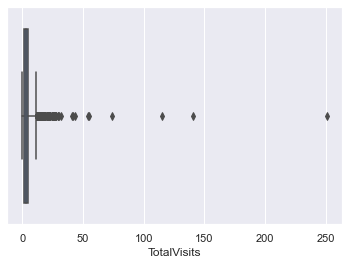

In [50]:
sns.boxplot(leads1.TotalVisits)

There are outliers present in the totalvisits columns, removing the outliers by capping the max value at 99 percentile.

In [51]:
Q3 = leads1.TotalVisits.quantile(0.99)
leads1 = leads1[(leads1.TotalVisits <= Q3)]

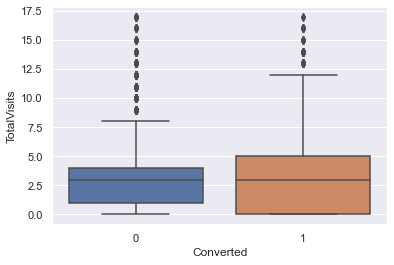

In [52]:
sns.boxplot(y='TotalVisits',x='Converted',data = leads1)
plt.show()

In [53]:
percentiles =leads1['TotalVisits'].quantile([0.05,0.95]).values
leads1['TotalVisits'][leads1['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads1['TotalVisits'][leads1['TotalVisits'] >= percentiles[1]] = percentiles[1]

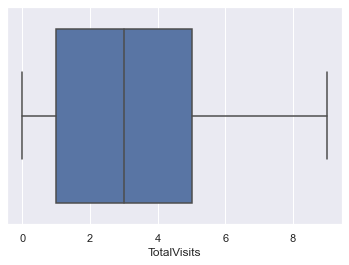

In [54]:
sns.boxplot(leads1['TotalVisits'])

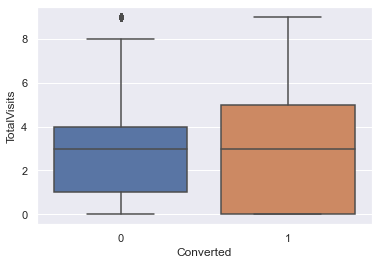

In [55]:
sns.boxplot(y='TotalVisits',x='Converted',data = leads1)
plt.show()

#### Total Time Spent on Website

In [56]:
leads1['Total Time Spent on Website'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8991.000000
mean      481.305973
std       544.883763
min         0.000000
25%         9.000000
50%       245.000000
75%       919.500000
90%      1372.000000
95%      1555.500000
99%      1837.200000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

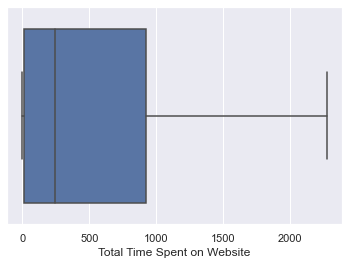

In [57]:
sns.boxplot(leads1['Total Time Spent on Website'])
plt.show()

In [58]:
Q3 = leads1['Total Time Spent on Website'].quantile(0.99)
leads1 = leads1[(leads1['Total Time Spent on Website'] <= Q3)]

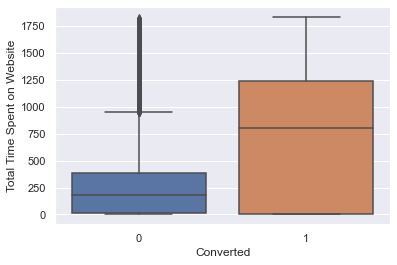

In [59]:
sns.boxplot(y='Total Time Spent on Website',x='Converted',data = leads1)
plt.show()

Inference-

Clearly the individuals who spend more time on website has more conversion rate.
Leads spending more time on the weblise are more likely to be converted.
Website should be made more engaging to make leads spend more time.

#### Page Views Per Visit

In [60]:
leads1['Page Views Per Visit'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    8901.000000
mean        2.336171
std         2.063347
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [61]:
Q3 = leads1['Page Views Per Visit'].quantile(0.95)
leads1 = leads1[(leads1['Page Views Per Visit'] <= Q3)]

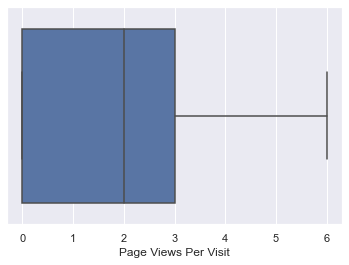

In [62]:
sns.boxplot(leads1['Page Views Per Visit'])
plt.show()

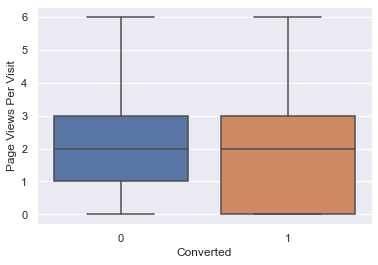

In [63]:
sns.boxplot(x='Converted',y='Page Views Per Visit',data = leads1)
plt.show()

#### 1.Dummy creation

In [64]:
leads1['A free copy of Mastering The Interview'] = leads1['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})

In [65]:
leads_dummy_df = pd.get_dummies(leads1,drop_first = True)

In [66]:
leads_dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8559 entries, 7927b2df-8bba-4d29-b9a2-b6e0beafe620 to 571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
Data columns (total 41 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Converted                                           8559 non-null   int64  
 1   TotalVisits                                         8559 non-null   float64
 2   Total Time Spent on Website                         8559 non-null   int64  
 3   Page Views Per Visit                                8559 non-null   float64
 4   A free copy of Mastering The Interview              8559 non-null   int64  
 5   Lead Origin_Landing Page Submission                 8559 non-null   uint8  
 6   Lead Origin_Lead Add Form                           8559 non-null   uint8  
 7   Lead Origin_Lead Import                             8559 non-null   uint8  
 8   Lead Source_Face

#### 2.Train test Data

In [67]:
# Import the required library
from sklearn.model_selection import train_test_split

In [68]:
X = leads_dummy_df.drop('Converted',axis = 1)

In [69]:
# Putting the target variable in y
y = leads_dummy_df['Converted']
y.head()

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0
2a272436-5132-4136-86fa-dcc88c88f482    0
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    1
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    0
3256f628-e534-4826-9d63-4a8b88782852    1
Name: Converted, dtype: int64

In [70]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

#### 3. Standardization

In [71]:
scaler = StandardScaler()

In [72]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [73]:
X_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Prospect ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
d4b50859-7a14-41c4-86a0-b90885c8fb70,-1.170946,-0.875088,-1.266858,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
029d8a9e-6d0a-4238-b5b7-26f460f99480,0.445073,-0.427200,1.146859,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
c0d0257c-d14f-4840-a47d-b5b1f8bf2b54,0.445073,-0.646379,1.146859,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
0b6370f0-213b-4853-adff-445ebad3e8d4,0.445073,-0.345246,1.146859,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
cf045ec0-3778-49c1-9ff3-91fd64515948,-1.170946,-0.875088,-1.266858,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e2d111ad-ee8f-41c2-8dee-dc4b9720638d,0.849078,-0.228985,1.750288,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
66f98677-2ae6-4b98-8ed7-c6341af54ecb,-1.170946,-0.875088,-1.266858,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
88f96e3a-3885-450e-86e3-015ccb7ae528,0.849078,-0.137502,1.750288,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#### 4. Model building- 
- Using Statsmodel api
- SKlearn

In [74]:
import statsmodels.api as sm

In [76]:
X_model1=sm.add_constant(X_train)
logmodel1=sm.GLM(y_train,X_model1,family=sm.families.Binomial())


In [77]:
logmodel1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5991
Model:                            GLM   Df Residuals:                     5953
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 07 Feb 2021   Deviance:                          nan
Time:                        13:56:21   Pearson chi2:                 7.19e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                              -8.206e+14   7.03e+07  -1.17e+07      0.000   -8.21e+14   -8.21e+14
TotalVisits                                         3.881e+14   1.44e+06    2.7e+08      0.000    3.88e+14    3.88e+14
Total Time Spent on Website                         4.377e+12      1e+06   4.36e+06      0.000    4.38e+12    4.38e+12
Page Views Per Visit                               -1.255e+14   1.58e+06  -7.93e+07      0.000   -1.25e+14   -1.25e+14
A free copy of Mastering The Interview              2.419e+13   2.74e+06   8.82e+06      0.000    2.42e+13    2.42e+13
Lead Origin_Landing Page Submission                -4.147e+13   2.81e+06  -1.48e+07      0.000   -4.15e+13   -4.15e+13
Lead Origin_Lead Add Form                           4.806e+14   2.68e+07   1.79e+07      0.000    4.81e+14    4.81e+14
Lead Origin_Lead Import                             5.554e+15   6.88e+07   8.08e+07      0.000    5.55e+15    5.55e+15
Lead Source_Facebook                                -5.07e+15   6.72e+07  -7.55e+07      0.000   -5.07e+15   -5.07e+15
Lead Source_Google                                 -5.683e+13   2.96e+06  -1.92e+07      0.000   -5.68e+13   -5.68e+13
Lead Source_Olark Chat                              8.049e+14   4.17e+06   1.93e+08      0.000    8.05e+14    8.05e+14
Lead Source_Organic Search                          -8.58e+13   3.41e+06  -2.51e+07      0.000   -8.58e+13   -8.58e+13
Lead Source_Others                                 -2.947e+14   1.67e+07  -1.76e+07      0.000   -2.95e+14   -2.95e+14
Lead Source_Reference                               7.569e+14   2.72e+07   2.78e+07      0.000    7.57e+14    7.57e+14
Lead Source_Referral Sites                         -3.751e+14   8.54e+06  -4.39e+07      0.000   -3.75e+14   -3.75e+14
Lead Source_Welingak Website                        1.126e+15   2.77e+07   4.06e+07      0.000    1.13e+15    1.13e+15
Last Activity_Email Bounced                        -1.079e+15   6.51e+06  -1.66e+08      0.000   -1.08e+15   -1.08e+15
Last Activity_Email Link Clicked                   -3.896e+14   9.42e+06  -4.14e+07      0.000    -3.9e+14    -3.9e+14
Last Activity_Email Opened                         -3.096e+13   5.33e+06   -5.8e+06      0.000    -3.1e+13    -3.1e+13
Last Activity_Form Submitted on Website            -1.799e+14   8.65e+06  -2.08e+07      0.000    -1.8e+14    -1.8e+14
Last Activity_Olark Chat Conversation              -1.004e+15   5.32e+06  -1.89e+08      0.000      -1e+15      -1e+15
Last Activity_Other_Activity                        7.189e+14   2.07e+07   3.48e+07      0.000    7.19e+14    7.19e+14
Last Activity_Page Visited on Website              -4.537e+14   6.36e+06  -7.13e+07      0.000   -4.54e+14  

#### 5. Feature selection using RFE

In [78]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [79]:
# Import RFE
from sklearn.feature_selection import RFE 

In [80]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [81]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('A free copy of Mastering The Interview', False, 16),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 13),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Others', False, 15),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 19),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 23),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 7),
 ('Last Activity_SMS Sent', True, 1),
 ('Las

In [82]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

#### Assessing the model with StatsModels -  Model creation with 15 features
- All the variables selected by RFE, on the basis of p-values and the VIF's.

In [83]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [84]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5991
Model:                            GLM   Df Residuals:                     5975
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.9
Date:                Sun, 07 Feb 2021   Deviance:                       5301.9
Time:                        13:57:17   Pearson chi2:                 6.08e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.9124      0.095    -20.176      0.000      -2.098      -1.727
Total Time Spent on Website                        1.0925      0.039     27.698      0.000       1.015       1.170
Lead Origin_Lead Add Form                          2.1066      0.882      2.388      0.017       0.378       3.836
Lead Origin_Lead Import                            1.0539      0.490      2.151      0.031       0.094       2.014
Lead Source_Olark Chat                             1.1574      0.101     11.415      0.000       0.959       1.356
Lead Source_Reference                              2.1934      0.911      2.408      0.016       0.408       3.979
Lead Source_Referral Sites                        -0.4259      0.351     -1.213      0.225      -1.114       0.262
Lead Source_Welingak Website                       3.5658      1.142      3.123      0.002       1.328       5.804
Last Activity_Email Bounced                       -1.3516      0.330     -4.096      0.000      -1.998      -0.705
Last Activity_Email Opened                         0.7428      0.105      7.088      0.000       0.537       0.948
Last Activity_Olark Chat Conversation             -0.9649      0.185     -5.229      0.000      -1.327      -0.603
Last Activity_Other_Activity                       2.0410      0.648      3.148      0.002       0.770       3.312
Last Activity_SMS Sent                             0.8403      0.158      5.306      0.000       0.530       1.151
Last Notable Activity_Had a Phone Conversation     1.2169      1.326      0.917      0.359      -1.383       3.816
Last Notable Activity_SMS Sent                     1.3249      0.146      9.091      0.000       1.039       1.611
Last Notable Activity_Unreachable                  2.7595      0.623      4.426      0.000       1.538       3.981
==================================================================================================================
"""

In [85]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,52.58
4,Lead Source_Reference,39.87
6,Lead Source_Welingak Website,13.80
11,Last Activity_SMS Sent,4.95
13,Last Notable Activity_SMS Sent,4.82
3,Lead Source_Olark Chat,1.83
9,Last Activity_Olark Chat Conversation,1.43
10,Last Activity_Other_Activity,1.43
12,Last Notable Activity_Had a Phone Conversation,1.43
0,Total Time Spent on Website,1.30


In [87]:
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [89]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5991
Model:                            GLM   Df Residuals:                     5976
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.2
Date:                Sun, 07 Feb 2021   Deviance:                       5308.5
Time:                        13:59:08   Pearson chi2:                 6.08e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.9058      0.095    -20.153      0.000      -2.091      -1.720
Total Time Spent on Website                        1.0904      0.039     27.690      0.000       1.013       1.168
Lead Origin_Lead Import                            1.0473      0.490      2.138      0.032       0.087       2.007
Lead Source_Olark Chat                             1.1552      0.101     11.412      0.000       0.957       1.354
Lead Source_Reference                              4.2935      0.239     17.969      0.000       3.825       4.762
Lead Source_Referral Sites                        -0.4301      0.351     -1.225      0.220      -1.118       0.258
Lead Source_Welingak Website                       5.6666      0.728      7.781      0.000       4.239       7.094
Last Activity_Email Bounced                       -1.3567      0.330     -4.113      0.000      -2.003      -0.710
Last Activity_Email Opened                         0.7415      0.105      7.089      0.000       0.537       0.947
Last Activity_Olark Chat Conversation             -0.9702      0.184     -5.262      0.000      -1.332      -0.609
Last Activity_Other_Activity                       2.0347      0.648      3.140      0.002       0.765       3.305
Last Activity_SMS Sent                             0.8349      0.158      5.278      0.000       0.525       1.145
Last Notable Activity_Had a Phone Conversation     1.2165      1.326      0.917      0.359      -1.383       3.816
Last Notable Activity_SMS Sent                     1.3284      0.146      9.119      0.000       1.043       1.614
Last Notable Activity_Unreachable                  2.7536      0.623      4.417      0.000       1.532       3.975
==================================================================================================================
"""

In [90]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_SMS Sent,4.95
12,Last Notable Activity_SMS Sent,4.82
2,Lead Source_Olark Chat,1.83
8,Last Activity_Olark Chat Conversation,1.43
9,Last Activity_Other_Activity,1.43
11,Last Notable Activity_Had a Phone Conversation,1.43
0,Total Time Spent on Website,1.30
7,Last Activity_Email Opened,1.18
3,Lead Source_Reference,1.16
5,Lead Source_Welingak Website,1.06


In [91]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [92]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5991
Model:                            GLM   Df Residuals:                     5977
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.7
Date:                Sun, 07 Feb 2021   Deviance:                       5309.4
Time:                        13:59:53   Pearson chi2:                 6.08e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.9055      0.095    -20.151      0.000      -2.091      -1.720
Total Time Spent on Website               1.0903      0.039     27.692      0.000       1.013       1.168
Lead Origin_Lead Import                   1.0468      0.490      2.137      0.033       0.087       2.007
Lead Source_Olark Chat                    1.1532      0.101     11.395      0.000       0.955       1.352
Lead Source_Reference                     4.2921      0.239     17.963      0.000       3.824       4.760
Lead Source_Referral Sites               -0.4305      0.351     -1.227      0.220      -1.118       0.257
Lead Source_Welingak Website              5.6661      0.728      7.780      0.000       4.239       7.094
Last Activity_Email Bounced              -1.3566      0.330     -4.113      0.000      -2.003      -0.710
Last Activity_Email Opened                0.7417      0.105      7.091      0.000       0.537       0.947
Last Activity_Olark Chat Conversation    -0.9692      0.184     -5.257      0.000      -1.331      -0.608
Last Activity_Other_Activity              2.3679      0.554      4.275      0.000       1.282       3.454
Last Activity_SMS Sent                    0.8350      0.158      5.279      0.000       0.525       1.145
Last Notable Activity_SMS Sent            1.3285      0.146      9.119      0.000       1.043       1.614
Last Notable Activity_Unreachable         2.7536      0.623      4.418      0.000       1.532       3.975
=========================================================================================================
"""

In [93]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_SMS Sent,4.95
11,Last Notable Activity_SMS Sent,4.82
2,Lead Source_Olark Chat,1.83
8,Last Activity_Olark Chat Conversation,1.43
0,Total Time Spent on Website,1.30
7,Last Activity_Email Opened,1.18
3,Lead Source_Reference,1.16
5,Lead Source_Welingak Website,1.06
1,Lead Origin_Lead Import,1.02
4,Lead Source_Referral Sites,1.02


In [94]:
X_train.drop('Lead Source_Referral Sites', axis = 1, inplace = True)

In [95]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5991
Model:                            GLM   Df Residuals:                     5978
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.5
Date:                Sun, 07 Feb 2021   Deviance:                       5311.0
Time:                        14:00:53   Pearson chi2:                 6.09e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.9137      0.094    -20.274      0.000      -2.099      -1.729
Total Time Spent on Website               1.0914      0.039     27.723      0.000       1.014       1.169
Lead Origin_Lead Import                   1.0549      0.490      2.154      0.031       0.095       2.015
Lead Source_Olark Chat                    1.1609      0.101     11.486      0.000       0.963       1.359
Lead Source_Reference                     4.2997      0.239     17.998      0.000       3.831       4.768
Lead Source_Welingak Website              5.6734      0.728      7.790      0.000       4.246       7.101
Last Activity_Email Bounced              -1.3530      0.330     -4.102      0.000      -1.999      -0.707
Last Activity_Email Opened                0.7422      0.105      7.096      0.000       0.537       0.947
Last Activity_Olark Chat Conversation    -0.9704      0.184     -5.264      0.000      -1.332      -0.609
Last Activity_Other_Activity              2.3747      0.554      4.286      0.000       1.289       3.461
Last Activity_SMS Sent                    0.8380      0.158      5.297      0.000       0.528       1.148
Last Notable Activity_SMS Sent            1.3305      0.146      9.132      0.000       1.045       1.616
Last Notable Activity_Unreachable         2.7214      0.620      4.388      0.000       1.506       3.937
=========================================================================================================
"""

In [96]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,4.94
10,Last Notable Activity_SMS Sent,4.82
2,Lead Source_Olark Chat,1.82
7,Last Activity_Olark Chat Conversation,1.43
0,Total Time Spent on Website,1.30
3,Lead Source_Reference,1.16
6,Last Activity_Email Opened,1.16
4,Lead Source_Welingak Website,1.06
1,Lead Origin_Lead Import,1.01
5,Last Activity_Email Bounced,1.01


#### Creating Prediction

In [97]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Prospect ID
d4b50859-7a14-41c4-86a0-b90885c8fb70    0.897800
029d8a9e-6d0a-4238-b5b7-26f460f99480    0.162761
c0d0257c-d14f-4840-a47d-b5b1f8bf2b54    0.026867
0b6370f0-213b-4853-adff-445ebad3e8d4    0.175320
cf045ec0-3778-49c1-9ff3-91fd64515948    0.275721
c0c6af0d-fef2-46b3-a902-28905d3b82df    0.395295
9e33ff1b-27ab-46bf-a94c-4789978c9ce8    0.116416
bb5bd23b-f481-4ad9-a2a6-54601f1c0f6e    0.064262
af964fca-a43b-4aad-bfba-e70f12b88505    0.868696
6b7f56ca-46bb-4331-b23f-3eb204fa8736    0.178043
dtype: float64

In [98]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.89779969, 0.16276091, 0.02686706, 0.17532013, 0.27572079,
       0.39529461, 0.11641644, 0.0642621 , 0.86869573, 0.17804337])

In [99]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.897800
1,0,0.162761
2,0,0.026867
3,0,0.175320
4,0,0.275721


In [100]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.897800,1
1,0,0.162761,0
2,0,0.026867,0
3,0,0.175320,0
4,0,0.275721,0


#### Model Evaluation

In [101]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [102]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3262,  467],
       [ 767, 1495]], dtype=int64)

In [103]:
# Predicted     not_churn    churn
# Actual
# not_churn        3291       439
# churn             739      1464

In [104]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7940243698881656

In [105]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [106]:
# Calculating the sensitivity
TP/(TP+FN)

0.6609195402298851

In [107]:
# Calculating the specificity
TN/(TN+FP)

0.8747653526414588

### 6. Roc Curve-
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.#### Optimise Cut off (ROC Curve)

In [108]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

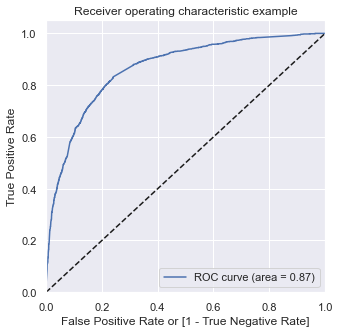

In [110]:
#Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [111]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.897800,1,1,1,1,1,1,1,1,1,1,0
1,0,0.162761,0,1,1,0,0,0,0,0,0,0,0
2,0,0.026867,0,1,0,0,0,0,0,0,0,0,0
3,0,0.175320,0,1,1,0,0,0,0,0,0,0,0
4,0,0.275721,0,1,1,1,0,0,0,0,0,0,0


In [112]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377566,1.000000,0.000000
0.1,0.1,0.566183,0.970822,0.320729
0.2,0.2,0.727424,0.904509,0.620005
0.3,0.3,0.787848,0.815650,0.770984
0.4,0.4,0.795360,0.747569,0.824350
0.5,0.5,0.794024,0.660920,0.874765
0.6,0.6,0.788182,0.587533,0.909895
0.7,0.7,0.761809,0.454465,0.948243
0.8,0.8,0.740945,0.362069,0.970770
0.9,0.9,0.687865,0.190981,0.989273


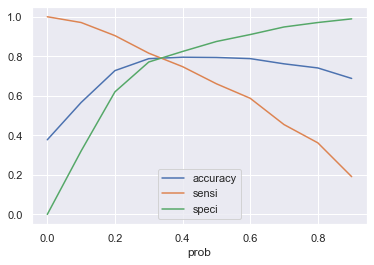

In [113]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it is visible that the optimal cut off is at 0.35.

In [114]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.897800,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.162761,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.026867,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.175320,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.275721,0,1,1,1,0,0,0,0,0,0,0,0


In [115]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7918544483391754

In [116]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2952,  777],
       [ 470, 1792]], dtype=int64)

In [117]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [118]:
# Calculating the sensitivity
TP/(TP+FN)

0.7922192749778957

In [119]:
# Calculating the specificity
TN/(TN+FP)

0.7916331456154465

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

####  Prediction on Test set

In [120]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [121]:
# Substituting all the columns in the final train model
col = X_train.columns
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [122]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])

In [123]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.140872
1,1,0.906146
2,1,0.465559
3,0,0.064179
4,0,0.064179


In [124]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.140872,0
1,1,0.906146,1
2,1,0.465559,1
3,0,0.064179,0
4,0,0.064179,0
...,...,...,...
2563,1,0.582788,1
2564,1,0.897673,1
2565,1,0.404498,1
2566,1,0.275444,0


In [125]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7819314641744548

In [126]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1259,  364],
       [ 196,  749]], dtype=int64)

In [127]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [128]:
# Calculating the sensitivity
TP/(TP+FN)

0.7925925925925926

In [129]:
# Calculating the specificity
TN/(TN+FP)

0.7757239679605669

#### Precision-Recall

In [130]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3262,  467],
       [ 767, 1495]], dtype=int64)

In [131]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7619775739041794

In [132]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6609195402298851

#### Precision and recall tradeoff

In [133]:
from sklearn.metrics import precision_recall_curve

In [134]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 5986    0
 5987    0
 5988    0
 5989    0
 5990    1
 Name: Converted, Length: 5991, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 5986    1
 5987    0
 5988    0
 5989    0
 5990    1
 Name: Predicted, Length: 5991, dtype: int64)

In [135]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

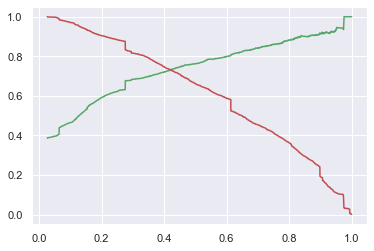

In [136]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [137]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.897800,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.162761,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.026867,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.175320,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.275721,0,1,1,1,0,0,0,0,0,0,0,0


In [138]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7956935403104657

In [139]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3098,  631],
       [ 593, 1669]], dtype=int64)

In [140]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [141]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7256521739130435

In [142]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.737842617152962

#### Prediction on Test set

In [143]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.140872
1,1,0.906146
2,1,0.465559
3,0,0.064179
4,0,0.064179


In [144]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.140872,0
1,1,0.906146,1
2,1,0.465559,1
3,0,0.064179,0
4,0,0.064179,0
...,...,...,...
2563,1,0.582788,1
2564,1,0.897673,1
2565,1,0.404498,0
2566,1,0.275444,0


In [145]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7959501557632399

In [146]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1336,  287],
       [ 237,  708]], dtype=int64)

In [147]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [148]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7115577889447237

In [149]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7492063492063492

In [150]:
# Calculating the sensitivity
TP/(TP+FN)

0.7492063492063492

In [151]:
# Calculating the specificity
TN/(TN+FP)

0.8231669747381393